In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
import numpy as np


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
malaysiasite = pd.read_csv('/content/drive/MyDrive/TAMUCC-SEU NASA Pandora-AERONET Project/SEU AERONET/Data/malaysiasite.csv')

In [ ]:
finecourse = pd.read_csv('/content/drive/MyDrive/TAMUCC-SEU NASA Pandora-AERONET Project/SEU AERONET/Data/Malaysiafinecourse.csv')

In [ ]:
malaysiasite = malaysiasite.drop(malaysiasite.index[:5])

In [ ]:
finecourse = finecourse.drop(finecourse.index[:5])

In [ ]:
malaysiasite = malaysiasite.reset_index(drop=True)

In [ ]:
finecourse = finecourse.reset_index(drop=True)

In [ ]:
malaysiasite.columns = malaysiasite.iloc[0]
malaysiasite = malaysiasite.drop(finecourse.index[0])
malaysiasite = malaysiasite.reset_index(drop=True)
pd.set_option('display.max_columns', None)

In [ ]:
finecourse.columns = finecourse.iloc[0]
finecourse = finecourse.drop(finecourse.index[0])
finecourse = finecourse.reset_index(drop=True)
pd.set_option('display.max_columns', None)

In [ ]:
malaysiasite.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,AOD_620nm,AOD_560nm,AOD_555nm,AOD_551nm,AOD_532nm,AOD_531nm,AOD_510nm,AOD_500nm,AOD_490nm,AOD_443nm,AOD_440nm,AOD_412nm,AOD_400nm,AOD_380nm,AOD_340nm,Precipitable_Water(cm),AOD_681nm,AOD_709nm,AOD_Empty,AOD_Empty,AOD_Empty,AOD_Empty,AOD_Empty,Triplet_Variability_1640,Triplet_Variability_1020,Triplet_Variability_870,Triplet_Variability_865,Triplet_Variability_779,Triplet_Variability_675,Triplet_Variability_667,Triplet_Variability_620,Triplet_Variability_560,Triplet_Variability_555,Triplet_Variability_551,Triplet_Variability_532,Triplet_Variability_531,Triplet_Variability_510,Triplet_Variability_500,Triplet_Variability_490,Triplet_Variability_443,Triplet_Variability_440,Triplet_Variability_412,Triplet_Variability_400,Triplet_Variability_380,Triplet_Variability_340,Triplet_Variability_Precipitable_Water(cm),Triplet_Variability_681,Triplet_Variability_709,Triplet_Variability_AOD_Empty,Triplet_Variability_AOD_Empty,Triplet_Variability_AOD_Empty,Triplet_Variability_AOD_Empty,Triplet_Variability_AOD_Empty,440-870_Angstrom_Exponent,380-500_Angstrom_Exponent,440-675_Angstrom_Exponent,500-870_Angstrom_Exponent,340-440_Angstrom_Exponent,440-675_Angstrom_Exponent[Polar],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m),Solar_Zenith_Angle(Degrees),Optical_Air_Mass,Sensor_Temperature(Degrees_C),Ozone(Dobson),NO2(Dobson),Last_Date_Processed,Number_of_Wavelengths,Exact_Wavelengths_of_AOD(um)_1640nm,Exact_Wavelengths_of_AOD(um)_1020nm,Exact_Wavelengths_of_AOD(um)_870nm,Exact_Wavelengths_of_AOD(um)_865nm,Exact_Wavelengths_of_AOD(um)_779nm,Exact_Wavelengths_of_AOD(um)_675nm,Exact_Wavelengths_of_AOD(um)_667nm,Exact_Wavelengths_of_AOD(um)_620nm,Exact_Wavelengths_of_AOD(um)_560nm,Exact_Wavelengths_of_AOD(um)_555nm,Exact_Wavelengths_of_AOD(um)_551nm,Exact_Wavelengths_of_AOD(um)_532nm,Exact_Wavelengths_of_AOD(um)_531nm,Exact_Wavelengths_of_AOD(um)_510nm,Exact_Wavelengths_of_AOD(um)_500nm,Exact_Wavelengths_of_AOD(um)_490nm,Exact_Wavelengths_of_AOD(um)_443nm,Exact_Wavelengths_of_AOD(um)_440nm,Exact_Wavelengths_of_AOD(um)_412nm,Exact_Wavelengths_of_AOD(um)_400nm,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty
0,4/1/2024,2:07:32,92,92.088565,0.07328,0.133335,0.165266,-999,-999,0.231526,-999,-999,-999,-999,-999,-999,-999,-999,0.351492,-999,-999,0.411854,-999,-999,0.478717,0.517025,5.14892,-999,-999,-999,-999,-999,-999,-999,0.017996,0.013529,0.0086,-999,-999,0.001059,-999,-999,-999,-999,-999,-999,-999,-999,0.008445,-999,-999,0.013401,-999,-999,0.01239,0.010953,0.013845,-999,-999,-999,-999,-999,-999,-999,1.347114,1.119223,1.350985,1.363298,0.890398,-999,lev15,1228,AAQ9_MY_Cheras,3.106236,101.717917,45,47.251039,1.471323,34.3,261.685567,0.21477,0.19287037,9,1.6396,1.0195,0.87,-999,-999,0.675,-999,-999,-999,-999,-999,-999,-999,-999,0.5,-999,-999,0.4395,-999,-999,0.3796,0.3397,0.9371,-999,-999,-999,-999,-999,-999,-999
1,4/1/2024,2:35:47,92,92.108183,0.083019,0.155886,0.199105,-999,-999,0.289736,-999,-999,-999,-999,-999,-999,-999,-999,0.448875,-999,-999,0.5255,-999,-999,0.606971,0.647355,5.246579,-999,-999,-999,-999,-999,-999,-999,0.004552,0.003416,0.001968,-999,-999,0.000994,-999,-999,-999,-999,-999,-999,-999,-999,0.005843,-999,-999,0.006902,-999,-999,0.005269,0.005455,0.005314,-999,-999,-999,-999,-999,-999,-999,1.431687,1.092757,1.40016,1.467383,0.818674,-999,lev15,1228,AAQ9_MY_Cheras,3.106236,101.717917,45,40.214742,1.308335,35.1,261.689355,0.214755,0.19287037,9,1.6396,1.0195,0.87,-999,-999,0.675,-999,-999,-999,-999,-999,-999,-999,-999,0.5,-999,-999,

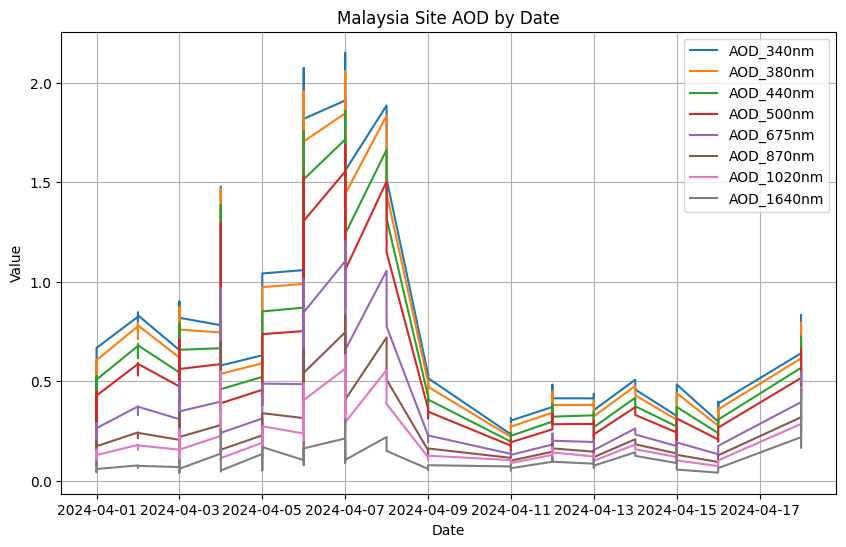

In [ ]:
#viewed AOD files from Malaysia site

malaysia_col = ['AOD_340nm', 'AOD_380nm', 'AOD_440nm', 'AOD_500nm', 'AOD_675nm', 'AOD_870nm', 'AOD_1020nm', 'AOD_1640nm']
for col in malaysia_col:
    malaysiasite[col] = pd.to_numeric(malaysiasite[col], errors='coerce')
    malaysiasite = malaysiasite.drop(malaysiasite[malaysiasite[col]<0].index)
    malaysiasite = malaysiasite.reset_index(drop=True)

malaysiasite['Date(dd:mm:yyyy)'] = pd.to_datetime(malaysiasite['Date(dd:mm:yyyy)'], format='%m/%d/%Y')
malaysiasite['Month'] = malaysiasite['Date(dd:mm:yyyy)'].dt.month

malaysiasite['Date'] = pd.to_datetime(malaysiasite['Date(dd:mm:yyyy)'], format='%m:%d:%Y')

#create the line plot
plt.figure(figsize=(10, 6))
for col in malaysia_col:
  plt.plot(malaysiasite['Date'], malaysiasite[col], label=col)
plt.title('Malaysia Site AOD by Date')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
finecourse.head()

,Date_(dd:mm:yyyy),Time_(hh:mm:ss),Day_of_Year,Day_of_Year(fraction),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],FineModeFraction_500nm[eta],2nd_Order_Reg_Fit_Error-Total_AOD_500nm[regression_dtau_a],RMSE_Fine_Mode_AOD_500nm[Dtau_f],RMSE_Coarse_Mode_AOD_500nm[Dtau_c],RMSE_FineModeFraction_500nm[Deta],Angstrom_Exponent(AE)-Total_500nm[alpha],dAE/dln(wavelength)-Total_500nm[alphap],AE-Fine_Mode_500nm[alpha_f],dAE/dln(wavelength)-Fine_Mode_500nm[alphap_f],Solar_Zenith_Angle(Degrees),Air_Mass,870nm_Input_AOD,865nm_Input_AOD,779nm_Input_AOD,675nm_Input_AOD,667nm_Input_AOD,620nm_Input_AOD,560nm_Input_AOD,555nm_Input_AOD,551nm_Input_AOD,532nm_Input_AOD,531nm_Input_AOD,510nm_Input_AOD,500nm_Input_AOD,490nm_Input_AOD,443nm_Input_AOD,440nm_Input_AOD,412nm_Input_AOD,400nm_Input_AOD,380nm_Input_AOD,681nm_Input_AOD,709nm_Input_AOD,AOD_Empty,AOD_Empty,AOD_Empty,AOD_Empty,AOD_Empty,Last_Processing_Date,Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m),Measurement_Type(solar or lunar),Number_of_Wavelengths,Exact_Wavelengths_of_AOD(um)_870nm,Exact_Wavelengths_of_AOD(um)_865nm,Exact_Wavelengths_of_AOD(um)_779nm,Exact_Wavelengths_of_AOD(um)_675nm,Exact_Wavelengths_of_AOD(um)_667nm,Exact_Wavelengths_of_AOD(um)_620nm,Exact_Wavelengths_of_AOD(um)_560nm,Exact_Wavelengths_of_AOD(um)_555nm,Exact_Wavelengths_of_AOD(um)_551nm,Exact_Wavelengths_of_AOD(um)_532nm,Exact_Wavelengths_of_AOD(um)_531nm,Exact_Wavelengths_of_AOD(um)_510nm,Exact_Wavelengths_of_AOD(um)_500nm,Exact_Wavelengths_of_AOD(um)_490nm,Exact_Wavelengths_of_AOD(um)_443nm,Exact_Wavelengths_of_AOD(um)_440nm,Exact_Wavelengths_of_AOD(um)_412nm,Exact_Wavelengths_of_AOD(um)_400nm,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty
0,1/24/2024,4:20:55,24,24.181192,0.767303,0.753745,0.013558,0.98233,0.004226,0.383164,0.382631,0.49859,0.686725,2.122259,0.701775,1.835348,27.406634,1.125795,0.406976,-999,-999,0.575275,-999,-999,-999,-999,-999,-999,-999,-999,0.771488,-999,-999,0.828009,-999,-999,0.867707,-999,-999,-999,-999,-999,-999,-999,27:01:2024,lev15,1228,AAQ9_MY_Cheras,3.106236,101.717917,45,solar,5,0.87,-999,-999,0.675,-999,-999,-999,-999,-999,-999,-999,-999,0.5,-999,-999,0.4395,-999,-999,0.3796,-999,-999,-999,-999,-999,-999,-999
1,1/24/2024,4:25:55,24,24.184664,0.756935,0.742913,0.014022,0.981476,0.004329,0.367747,0.367205,0.485044,0.707394,2.111367,0.723577,1.839075,26.719255,1.118929,0.400545,-999,-999,0.565335,-999,-999,-999,-999,-999,-999,-999,-999,0.761125,-999,-999,0.819621,-999,-999,0.862626,-999,-999,-999,-999,-999,-999,-999,27:01:2024,lev15,1228,AAQ9_MY_Cheras,3.106236,101.717917,45,solar,5,0.87,-999,-999,0.675,-999,-999,-999,-999,-999,-999,-999,-999,0.5,-999,-999,0.4395,-999,-999,0.3796,-999,-999,-999,-999,-999,-999,-999
2,1/24/2024,4:35:55,24,24.191609,0.786137,0.772002,0.014135,0.982019,0.00373,0.387572,0.38705,0.492271,0.696713,2.118134,0.712216,1.837163,25.466743,1.107037,0.41605,-999,-999,0.589242,-999,-999,-999,-999,-999,-999,-999,-999,0.79075,-999,-999,0.847161,-999,-999,0.893803,-999,-999,-999,-999,-999,-999,-999,27:01:2024,lev15,1228,AAQ9_MY_Cheras,3.106236,101.717917,45,solar,5,0.87,-999,-999,0.675,-999,-999,-999,-999,-999,-999,-999,-999,0.5,-999,-999,0.4395,-999,-999,0.3796,-999,-999,-999,-999,-999,-999,-999
3,1/24/2024,5:25:56,24,24.226343,0.699087,0.685372,0.013715,0.980381,0.002893,0.334247,0.333659,0.477193,0.715467,2.097804,0.732787,1.840575,22.422301,1.081265,0.370758,-999,-999,0.523134,-999,-999,-999,-999,-999,-999,-999,-999,0.702389,-999,-999,0.756671,-999,-999,0.801113,-999,-999,-999,-999,-999,-999,-999,27:01:2024,lev15,1228,AAQ9_MY_Cheras,3.106236,101.717917,45,solar,5,0.87,-999,-999,0.675,-999,-999,-999,-999,-999,-999,-999,-999,0.

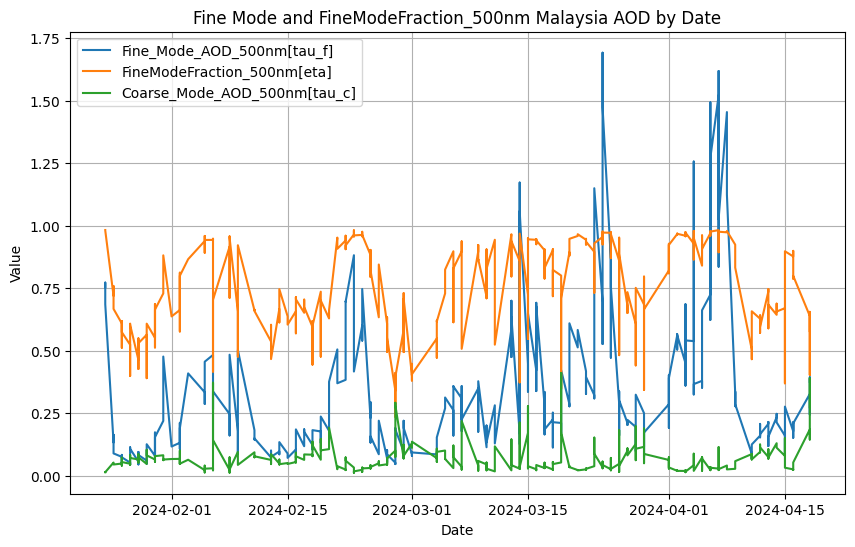

In [ ]:
# Convert 'Date_(dd:mm:yyyy)' to datetime
finecourse['Date'] = pd.to_datetime(finecourse['Date_(dd:mm:yyyy)'], errors='coerce')

# create a list of the columns to observe
fine_mode_aod_col = ['Fine_Mode_AOD_500nm[tau_f]', 'FineModeFraction_500nm[eta]', 'Coarse_Mode_AOD_500nm[tau_c]']

# create a for loop through each column in the list
for col in fine_mode_aod_col:
    if col in finecourse.columns:
      #numeric data type and drops the rows with negative values
        finecourse[col] = pd.to_numeric(finecourse[col], errors='coerce')
        finecourse = finecourse.drop(finecourse[finecourse[col] < 0].index)
        finecourse = finecourse.reset_index(drop=True)

if not finecourse.empty:
    plt.figure(figsize=(10, 6))
  #Loop through each specified column to plot
    for col in fine_mode_aod_col:
        if col in finecourse.columns:
            plt.plot(finecourse['Date'], finecourse[col], label=col)

    plt.title('Fine Mode and FineModeFraction_500nm Malaysia AOD by Date')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()
